In [1]:
import pandas as pd
import pyreadstat as prs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import category_encoders as ce
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [28]:
from sdv import SDV
from sdv import Metadata

In [86]:
pd.set_option('display.max_columns', None)

In [5]:
long_pdf = pd.read_spss('../data/uktus15_diary_ep_long.sav')
individual_pdf = pd.read_csv('../data/uktus15_individual_new.csv')

c:\DataScience\Python\machine_learning\venv\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (269) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
long_df, long_meta = prs.read_sav('../data/uktus15_diary_ep_long.sav', encoding="latin1")
# wide_df, wide_meta = prs.read_sav('../data/uktus15_diary_wide.sav', encoding="latin1")
# time_vars_df, time_vars_meta = prs.read_sav('../data/uktus15_dv_time_vars.sav', encoding="latin1")
# household_df, household_meta = prs.read_sav('../data/uktus15_household.sav', encoding="latin1")
individual_df, individual_meta = prs.read_sav('../data/uktus15_individual.sav', encoding="latin1")
# wksched_df, wksched_meta = prs.read_sav('../data/uktus15_wksched.sav', encoding="latin1")

In [30]:
long_meta.variable_value_labels

{'strata': {-2.0: 'Schedule not applicable'},
 'psu': {-2.0: 'Schedule not applicable'},
 'daynum': {-9.0: 'No answer/refused',
  -8.0: "Don't know",
  -7.0: 'Interview not achieved',
  -2.0: 'Schedule not applicable',
  -1.0: 'Item not applicable'},
 'HhOut': {110.0: 'Productive : Household interview completed, all eligible household members completed individual interviews and diary',
  210.0: 'Productive : At least one individual interview but not from all eligible household members',
  214.0: 'Productive : Household questionnaire completed â\x80\x93 no individual interviews',
  310.0: 'No contact with anyone at address after 6+ calls',
  321.0: 'Contact made at address. but not at selected DU/HH (USE IF MULTIPLE DUs/HHs ONLY)',
  322.0: 'Contact made. but not with responsible resident',
  410.0: 'Office refusal',
  421.0: 'Information refused about number of DUs/HHs at address',
  422.0: 'Information refused about people in household',
  430.0: 'Refusal before household interview',


In [31]:
print(long_pdf.columns)

Index(['serial', 'strata', 'psu', 'pnum', 'daynum', 'HhOut', 'IndOut',
       'DMFlag', 'IMonth', 'IYear', 'DVAge', 'DayNum_DiaryDay', 'DPday',
       'DiaryDate_Act', 'DiaryDay_Act', 'DiaryDateDiff', 'dmonth', 'dyear',
       'ddayw', 'DiaryType', 'WhenDiary', 'AfterDiaryDay', 'WhereStart',
       'WhereEnd', 'RushedD', 'Ordinary', 'KindOfDay', 'Trip', 'dia_wt_a',
       'dia_wt_b', 'epnum', 'tid', 'eptime', 'whatdoing', 'What_Oth1',
       'What_Oth2', 'What_Oth3', 'WhereWhen', 'Device', 'WithAlone',
       'WithSpouse', 'WithMother', 'WithFather', 'WithChild', 'WithOther',
       'WithOtherYK', 'WithMiss', 'WithNA', 'Enjoy', 'impuflag'],
      dtype='object')


In [6]:
individual_df.iloc[:,208].value

AttributeError: 'DataFrame' object has no attribute 'unique'

In [18]:
long_cols = ['serial', 'pnum', 'DMFlag', 'dmonth', 'ddayw', 'WhereStart', 'WhereEnd', 'RushedD', 'KindOfDay', 'dia_wt_a', 'Trip', 'tid', 'Device', 'WhereWhen', 'whatdoing', 'eptime']

long_df = long_df.loc[:,long_cols]


In [19]:
long_df.head()

,serial,pnum,DMFlag,dmonth,ddayw,WhereStart,WhereEnd,RushedD,KindOfDay,dia_wt_a,Trip,tid,Device,WhereWhen,whatdoing,eptime
0,11011202.0,1.0,2.0,12.0,1.0,1.0,1.0,2.0,3.0,2.021182,1.0,1.0,0.0,11.0,110.0,110.0
1,11011202.0,1.0,2.0,12.0,1.0,1.0,1.0,2.0,3.0,2.021182,1.0,12.0,0.0,11.0,8219.0,10.0
2,11011202.0,1.0,2.0,12.0,1.0,1.0,1.0,2.0,3.0,2.021182,1.0,13.0,0.0,11.0,310.0,10.0
3,11011202.0,1.0,2.0,12.0,1.0,1.0,1.0,2.0,3.0,2.021182,1.0,14.0,0.0,11.0,3210.0,10.0
4,11011202.0,1.0,2.0,12.0,1.0,1.0,1.0,2.0,3.0,2.021182,1.0,15.0,1.0,11.0,3110.0,10.0


In [12]:
long_df.shape

(587543, 16)

In [8]:
long_df = long_df.dropna()

In [36]:
individual_pdf.head()

,serial,strata,psu,pnum,DMFlag,HhOut,IndOut,ind_wt,IMonth,IYear,DMSex,DM014,DM016,DM510,DM1115,DM1619,WorkSta,NumAdult,NumChild,NumSSex,NumCPart,NumMPart,NumCivP,DVHsize,DVAge,MarStat,Relsize,Relate1,Relate2,Relate3,Relate4,Relate5,Relate6,Relate7,Relate8,Relate9,Relate10,SelPer,CCPersNo,Accom,Hhldr1,Hhldr2,Hhldr3,Hhldr4,Hhldr5,Hhldr6,Hhldr7,Hhldr8,Hhldr9,Hhldr10,HiHNum,Tenure,NumRooms,TVSet,TVSetNum,Cable,CableNum,Games,GamesNum,Land,LandNum,Mob,MobPerm,Comp,CompNum,Microwav,Dishwash,WashMach,Tumble,Freezer,HmIntnet,IntAcc1,IntAcc2,IntAcc3,IntAcc4,IntAcc5,IntAcc6,IntPurch,VehOwn,VehNum,Repairs,FrVegGr,FrVegPro,Wages,SelfEmp,Pension,UnempBen,BenOth,Invest,IncOth,Income,IncCat,Help1,Help2,Help3,Help4,Help5,Help6,Help7,Help8,Help9,Help10,Help11,Help12,Help13,Help14,Help15,Help16,Help17,Help18,Help19,Help20,Help21,Help22,Help23,Help24,Help25,Help26,Help27,Help28,Help29,Help30,Help31,Help32,Help33,PaidNum,PaidTime,PaidHrs,PaidDays,PaidNum2,PaidTim2,PaidHrs2,PaidDay2,PaidNum3,PaidTim3,PaidHrs3,PaidDay3,PaidNum4,PaidTim4,PaidHrs4,PaidDay4,PaidNum5,PaidTim5,PaidHrs5,PaidDay5,PaidNum6,PaidTim6,PaidHrs6,PaidDay6,PaidNum7,PaidTim7,PaidHrs7,PaidDay7,PaidNum8,PaidTim8,PaidHrs8,PaidDay8,PaidNum9,PaidTim9,PaidHrs9,PaidDay9,PaidNu10,PaidTi10,PaidHr10,PaidDa10,PaidNu11,PaidTi11,PaidHr11,PaidDa11,NPaidNum,NPaidTim,NPaidHrs,NPaidDay,NPaidLas,NPaidNu2,NPaidTi2,NPaidHr2,NPaidDa2,NPaidLa2,NPaidNu3,NPaidTi3,NPaidHr3,NPaidDa3,NPaidLa3,NPaidNu4,NPaidTi4,NPaidHr4,NPaidDa4,NPaidLa4,NPaidNu5,NPaidTi5,NPaidHr5,NPaidDa5,NPaidLa5,NPaidNu6,NPaidTi6,NPaidHr6,NPaidDa6,NPaidLa6,NPaidNu7,NPaidTi7,NPaidHr7,NPaidDa7,NPaidLa7,NPaidNu8,NPaidTi8,NPaidHr8,NPaidDa8,NPaidLa8,NPaidNu9,NPaidTi9,NPaidHr9,NPaidDa9,NPaidLa9,NPaidN10,NPaidT10,NPaidH10,NPaidD10,NPaidL10,NPaidN11,NPaidT11,NPaidH11,NPaidD11,NPaidL11,Indtype,PlBornC,Citizen1,Citizen2,Citizen3,Wrking,RelBus,JbAway,JbAwayY,EverWk,DtJbL,Stat,Sector,Manage,EmpNo,FtPtWk,JbPerm,JbNtPerm,HrWkUS,HrWkAc,ShiftWk,ShiftPat,WkArrang,WkArran2,WkArran3,WkArran4,WkArran5,WkArran6,WkArran7,WkArran8,WkArran9,PaidHol,PaidHolN,PaidOver,PaidOvHr,NetPay,NetPayB,NetPayP,NetWkly,NetPayHr,Solo,SENo,SEHrWkUs,SEHrWkAc,SENetPay,SENetPaB,WrkLoc,OthJb,OJHrWkUs,OJHrWkAc,OJNetPay,OJNetPaB,OJNetPaP,OJWkly,OJNetPHr,JbLook,JbLookAc,JbLookA2,JbLookA3,JbLookA4,JbLookA5,JbLookA6,JbLookA7,JbLookA8,JbLookA9,JbLook10,JbLook11,JbLook12,JbLook13,JbLook14,JbStart,LabStat,Benefits,Benefit2,Benefit3,Benefit4,Benefit5,Benefit6,Benefit7,Benefit8,Benefit9,SOC2010C,XSOC2010,IndexNo,ES2010,nssec,SECFlag,LSOC2000,XSOC2000,seg,sc,SIC2007,Educ,EducCur,FinFTEd,FinFTEdY,HiQual,Volunt,VolNum,VolTime,VolTimeH,VolTimeD,VolGrpMr,VolNum2,VolTime2,VolTime3,VolTime4,VolGrpM2,VolNum3,VolTime5,VolTime6,VolTime7,VolGrpM3,VolNum4,VolTime8,VolTime9,VolTim10,VolGrpM4,VolNum5,VolTim11,VolTim12,VolTim13,VolGrpM5,VolNum6,VolTim14,VolTim15,VolTim16,VolGrpM6,VolNum7,VolTim17,VolTim18,VolTim19,VolGrpM7,VolNum8,VolTim20,VolTim21,VolTim22,VolGrpM8,HlpOth,HlpTime,HlpTimeH,HlpTimeD,HlpWhoMr,HlpTime2,HlpTime3,HlpTime4,HlpWhoM2,HlpTime5,HlpTime6,HlpTime7,HlpWhoM3,HlpTime8,HlpTime9,HlpTim10,HlpWhoM4,HlpTim11,HlpTim12,HlpTim13,HlpWhoM5,HlpTim14,HlpTim15,HlpTim16,HlpWhoM6,HlpTim17,HlpTim18,HlpTim19,HlpWhoM7,HlpTim20,HlpTim21,HlpTim22,HlpWhoM8,DomWork,Cinema,Theatre,Museum,Librar,HistSite,SportEv,EatDrink,EntHome,LeisNum1,LeisNum2,LeisNum3,LeisNum4,LeisNum5,LeisNum6,LeisNum7,LeisNum8,LeisWee1,LeisWee2,LeisWee3,LeisWee4,LeisWee5,LeisWee6,LeisWee7,LeisWee8,Swim,KeepFit,Cycling,TeamGame,Racquet,Golf,Walking,Running,OthSport,SprtNum1,SprtNum2,SprtNum3,SprtNum4,SprtNum5,SprtNum6,SprtNum7,SprtNum8,SprtNum9,SprtWee1,SprtWee2,SprtWee3,SprtWee4,SprtWee5,SprtWee6,SprtWee7,SprtWee8,SprtWee9,GenHlth,CutDown,LongIll,EnjFam,EnjSpec,EnjShopF,EnjShop,EnjDIY,EnjGard,EnjTidy,EnjWash,EnjComf,EnjHmwk,Stressed,Rushed,SatisOv,Satis,Worth,Happy,Anxious,SatHlth,SatInc,SatBal,SatHouse,SatSoc,SatLeis,SatPart,SatJob,NonResCh,AccTrans,ChEnCook,ChEnWash,ChEnGard,ChEnShop,ChEnTidy,ChEnLook,ChSchl,CCarTyp1,CCarTyp2,CCarTyp3,C

In [20]:
ind_cols = ['serial', 'pnum', 'DMSex', 'WorkSta', 'DVAge', 'Income', 'Sector', 'NumChild', 'NumAdult']
ind_df = individual_df.loc[:, ind_cols]

In [21]:
ind_df.head()

,serial,pnum,DMSex,WorkSta,DVAge,Income,Sector,NumChild,NumAdult
0,11010903.0,1.0,1.0,4.0,80.0,3000.0,-1.0,0.0,2.0
1,11010903.0,2.0,2.0,4.0,71.0,3000.0,1.0,0.0,2.0
2,11010904.0,1.0,2.0,2.0,55.0,-9.0,-9.0,0.0,2.0
3,11010904.0,2.0,1.0,2.0,62.0,-9.0,2.0,0.0,2.0
4,11010906.0,1.0,2.0,2.0,52.0,3200.0,1.0,0.0,3.0


In [46]:
print(long_df.shape)

(587543, 16)


In [70]:
long_df['serial'] = long_df['serial'].astype('int').astype('str')
long_df['pnum'] = long_df['pnum'].astype('int').astype('str')

ind_df['serial'] = ind_df['serial'].astype('int').astype('str')
ind_df['pnum'] = ind_df['pnum'].astype('int').astype('str')

In [71]:
long_df['uid'] = long_df['serial'] + long_df['pnum']
ind_df['uid'] = ind_df['serial'] + ind_df['pnum']

In [74]:
long_df = long_df.drop(['serial', 'pnum'], axis = 1)
ind_df = ind_df.drop(['serial', 'pnum'], axis = 1)

In [75]:
ind_df.head()

,DMSex,WorkSta,DVAge,Income,Sector,NumChild,NumAdult,uid
0,1.0,4.0,80.0,3000.0,-1.0,0.0,2.0,110109031
1,2.0,4.0,71.0,3000.0,1.0,0.0,2.0,110109032
2,2.0,2.0,55.0,-9.0,-9.0,0.0,2.0,110109041
3,1.0,2.0,62.0,-9.0,2.0,0.0,2.0,110109042
4,2.0,2.0,52.0,3200.0,1.0,0.0,3.0,110109061


In [76]:
long_df.head()

,DMFlag,dmonth,ddayw,WhereStart,WhereEnd,RushedD,KindOfDay,dia_wt_a,Trip,tid,Device,WhereWhen,whatdoing,eptime,uid
0,2.0,12.0,1.0,1.0,1.0,2.0,3.0,2.021182,1.0,1.0,0.0,11.0,110.0,110.0,110112021
1,2.0,12.0,1.0,1.0,1.0,2.0,3.0,2.021182,1.0,12.0,0.0,11.0,8219.0,10.0,110112021
2,2.0,12.0,1.0,1.0,1.0,2.0,3.0,2.021182,1.0,13.0,0.0,11.0,310.0,10.0,110112021
3,2.0,12.0,1.0,1.0,1.0,2.0,3.0,2.021182,1.0,14.0,0.0,11.0,3210.0,10.0,110112021
4,2.0,12.0,1.0,1.0,1.0,2.0,3.0,2.021182,1.0,15.0,1.0,11.0,3110.0,10.0,110112021


In [80]:
def train_gen(table):
    # metadata = Metadata()
    # table = {'df': data}
    # metadata.add_table(
    #     name = 'df',
    #     data = table['df']
    # )
    sdv = SDV()
    sdv.fit(metadata, table)
    sdv.save('../models/test_sdv.pkl')

def data_gen():
    sdv = SDV.load('../models/test_sdv.pkl')
    samples = sdv.sample()
    return samples

In [96]:
metadata = Metadata()
tables = {'long': long_df, 'ind': ind_df}
metadata.add_table(
    name='long',
    data=tables['long'],
    foreign_key= 'uid'
)

In [97]:
# tables = {'ind': ind_df}
metadata.add_table(
    name='ind',
    data=tables['ind'],
    primary_key= 'uid'
)

In [98]:
train_gen(tables)
synth_long = data_gen()

In [34]:
train_gen(ind_df)
synth_ind = data_gen()

In [107]:
synth_long['ind'].shape

(11421, 8)

In [108]:
synth_long['long'].shape

(587632, 15)

In [109]:
merged_df = synth_long['ind'].merge(synth_long['long'], on='uid', how='inner')
merged_df.drop(['uid'], axis=1, inplace=True)

In [110]:
merged_df.head()

,DMSex,WorkSta,DVAge,Income,Sector,NumChild,NumAdult,DMFlag,dmonth,ddayw,WhereStart,WhereEnd,RushedD,KindOfDay,dia_wt_a,Trip,tid,Device,WhereWhen,whatdoing,eptime


In [111]:
merged_df.shape

(0, 21)

In [103]:
merged_df.to_csv('../data/long_individual_merged_left.csv', index= False)

In [67]:
synth_long['df'].head()

,serial,pnum,DMFlag,dmonth,ddayw,WhereStart,WhereEnd,RushedD,KindOfDay,dia_wt_a,Trip,tid,Device,WhereWhen,whatdoing,eptime
0,13159099.0,3.0,2.0,7.0,1.0,-1.0,0.0,2.0,-1.0,0.794318,2.0,47.0,-0.0,15.0,2473.0,160.0
1,24747824.0,3.0,1.0,11.0,2.0,0.0,-0.0,2.0,-1.0,0.931495,-1.0,110.0,-2.0,4.0,1091.0,70.0
2,17245160.0,2.0,2.0,7.0,1.0,1.0,2.0,2.0,7.0,1.477763,3.0,1.0,1.0,17.0,333.0,10.0
3,23192952.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,2.0,1.793472,1.0,31.0,-1.0,15.0,0.0,10.0
4,15892359.0,2.0,2.0,7.0,2.0,2.0,1.0,2.0,4.0,0.391315,3.0,88.0,1.0,13.0,4885.0,180.0


In [36]:
synth_ind['df'].head()

,serial,pnum,DMSex,WorkSta,DVAge,Income,Sector,NumChild,NumAdult
0,14265009.0,2.0,2.0,-0.0,0.0,44950.0,-2.0,2.0,2.0
1,11048670.0,4.0,1.0,-3.0,25.0,899.0,0.0,2.0,4.0
2,19109385.0,3.0,2.0,-7.0,10.0,9444.0,-0.0,3.0,3.0
3,23770849.0,2.0,1.0,9.0,38.0,-9.0,-1.0,3.0,3.0
4,18451375.0,4.0,1.0,6.0,13.0,-9.0,-2.0,1.0,2.0


In [37]:
merged_df = synth_ind['df'].merge(synth_long['df'], on=['serial', 'pnum'], how='inner')
merged_df.drop(['serial', 'pnum'], axis=1, inplace=True)

In [88]:
merged_df = merged_df.dropna()
merged_df.shape

(11421, 21)

In [90]:
merged_df.to_csv('../data/long_individual_merged_short.csv', index= False)

In [89]:
merged_df.head()

,DMSex,WorkSta,DVAge,Income,Sector,NumChild,NumAdult,DMFlag,dmonth,ddayw,WhereStart,WhereEnd,RushedD,KindOfDay,dia_wt_a,Trip,tid,Device,WhereWhen,whatdoing,eptime
0,2.0,2.0,23.0,16402.0,-1.0,1.0,2.0,2.0,7.0,1.0,2.0,2.0,2.0,6.0,0.987531,5.0,126.0,1.0,19.0,4667.0,60.0
1,1.0,-2.0,11.0,10065.0,-1.0,3.0,1.0,2.0,7.0,3.0,2.0,2.0,1.0,5.0,0.896628,2.0,71.0,-1.0,-2.0,508.0,140.0
2,1.0,-4.0,5.0,-9.0,0.0,1.0,2.0,2.0,12.0,2.0,2.0,2.0,2.0,7.0,0.890136,5.0,22.0,-1.0,24.0,4119.0,110.0
3,1.0,-2.0,24.0,2289.0,-1.0,2.0,2.0,1.0,8.0,2.0,-0.0,-2.0,0.0,4.0,1.115900,-1.0,13.0,1.0,17.0,7864.0,30.0
4,2.0,5.0,70.0,25549.0,2.0,1.0,1.0,2.0,9.0,2.0,0.0,-0.0,-0.0,2.0,0.771629,1.0,80.0,-1.0,9.0,1435.0,10.0


In [26]:
merged_df.to_csv('../data/long_individual_merged_test.csv', index= False)

In [42]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587543 entries, 0 to 587542
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   DMSex       587543 non-null  object  
 1   WorkSta     587543 non-null  object  
 2   DVAge       587543 non-null  int64   
 3   Income      587543 non-null  object  
 4   Sector      587543 non-null  object  
 5   NumChild    587543 non-null  int64   
 6   NumAdult    587543 non-null  int64   
 7   DMFlag      587543 non-null  category
 8   dmonth      587543 non-null  category
 9   ddayw       587543 non-null  category
 10  WhereStart  587543 non-null  category
 11  WhereEnd    587543 non-null  category
 12  RushedD     587543 non-null  category
 13  KindOfDay   587543 non-null  category
 14  dia_wt_a    587543 non-null  float64 
 15  Trip        587543 non-null  category
 16  tid         587543 non-null  category
 17  Device      587543 non-null  category
 18  WhereWhen   587543 non-n

In [43]:
merged_df['DMSex'].value_counts()

Female    339140
Male      248403
Name: DMSex, dtype: int64

In [40]:
def count_encoding(df):
    data = pd.DataFrame()
    for i in df.columns:
        if df[i].dtype == 'category' or df[i].dtype == 'object':
            count_enc = ce.CountEncoder()
            # Transform the features, rename the columns with the _count suffix, and join to dataframe
            count_encoded = count_enc.fit_transform(df[i])
            if len(data.columns) < 1:
                data = df.join(count_encoded.add_suffix("_count"))
            else:
                data = data.join(count_encoded.add_suffix("_count"))
            data.drop(i, axis=1, inplace=True)
    return data

In [45]:
long_enc = count_encoding(long_pdf)
ind_enc = count_encoding(ind_df)

In [44]:
long_enc

""


In [60]:
data.shape

(587543, 21)

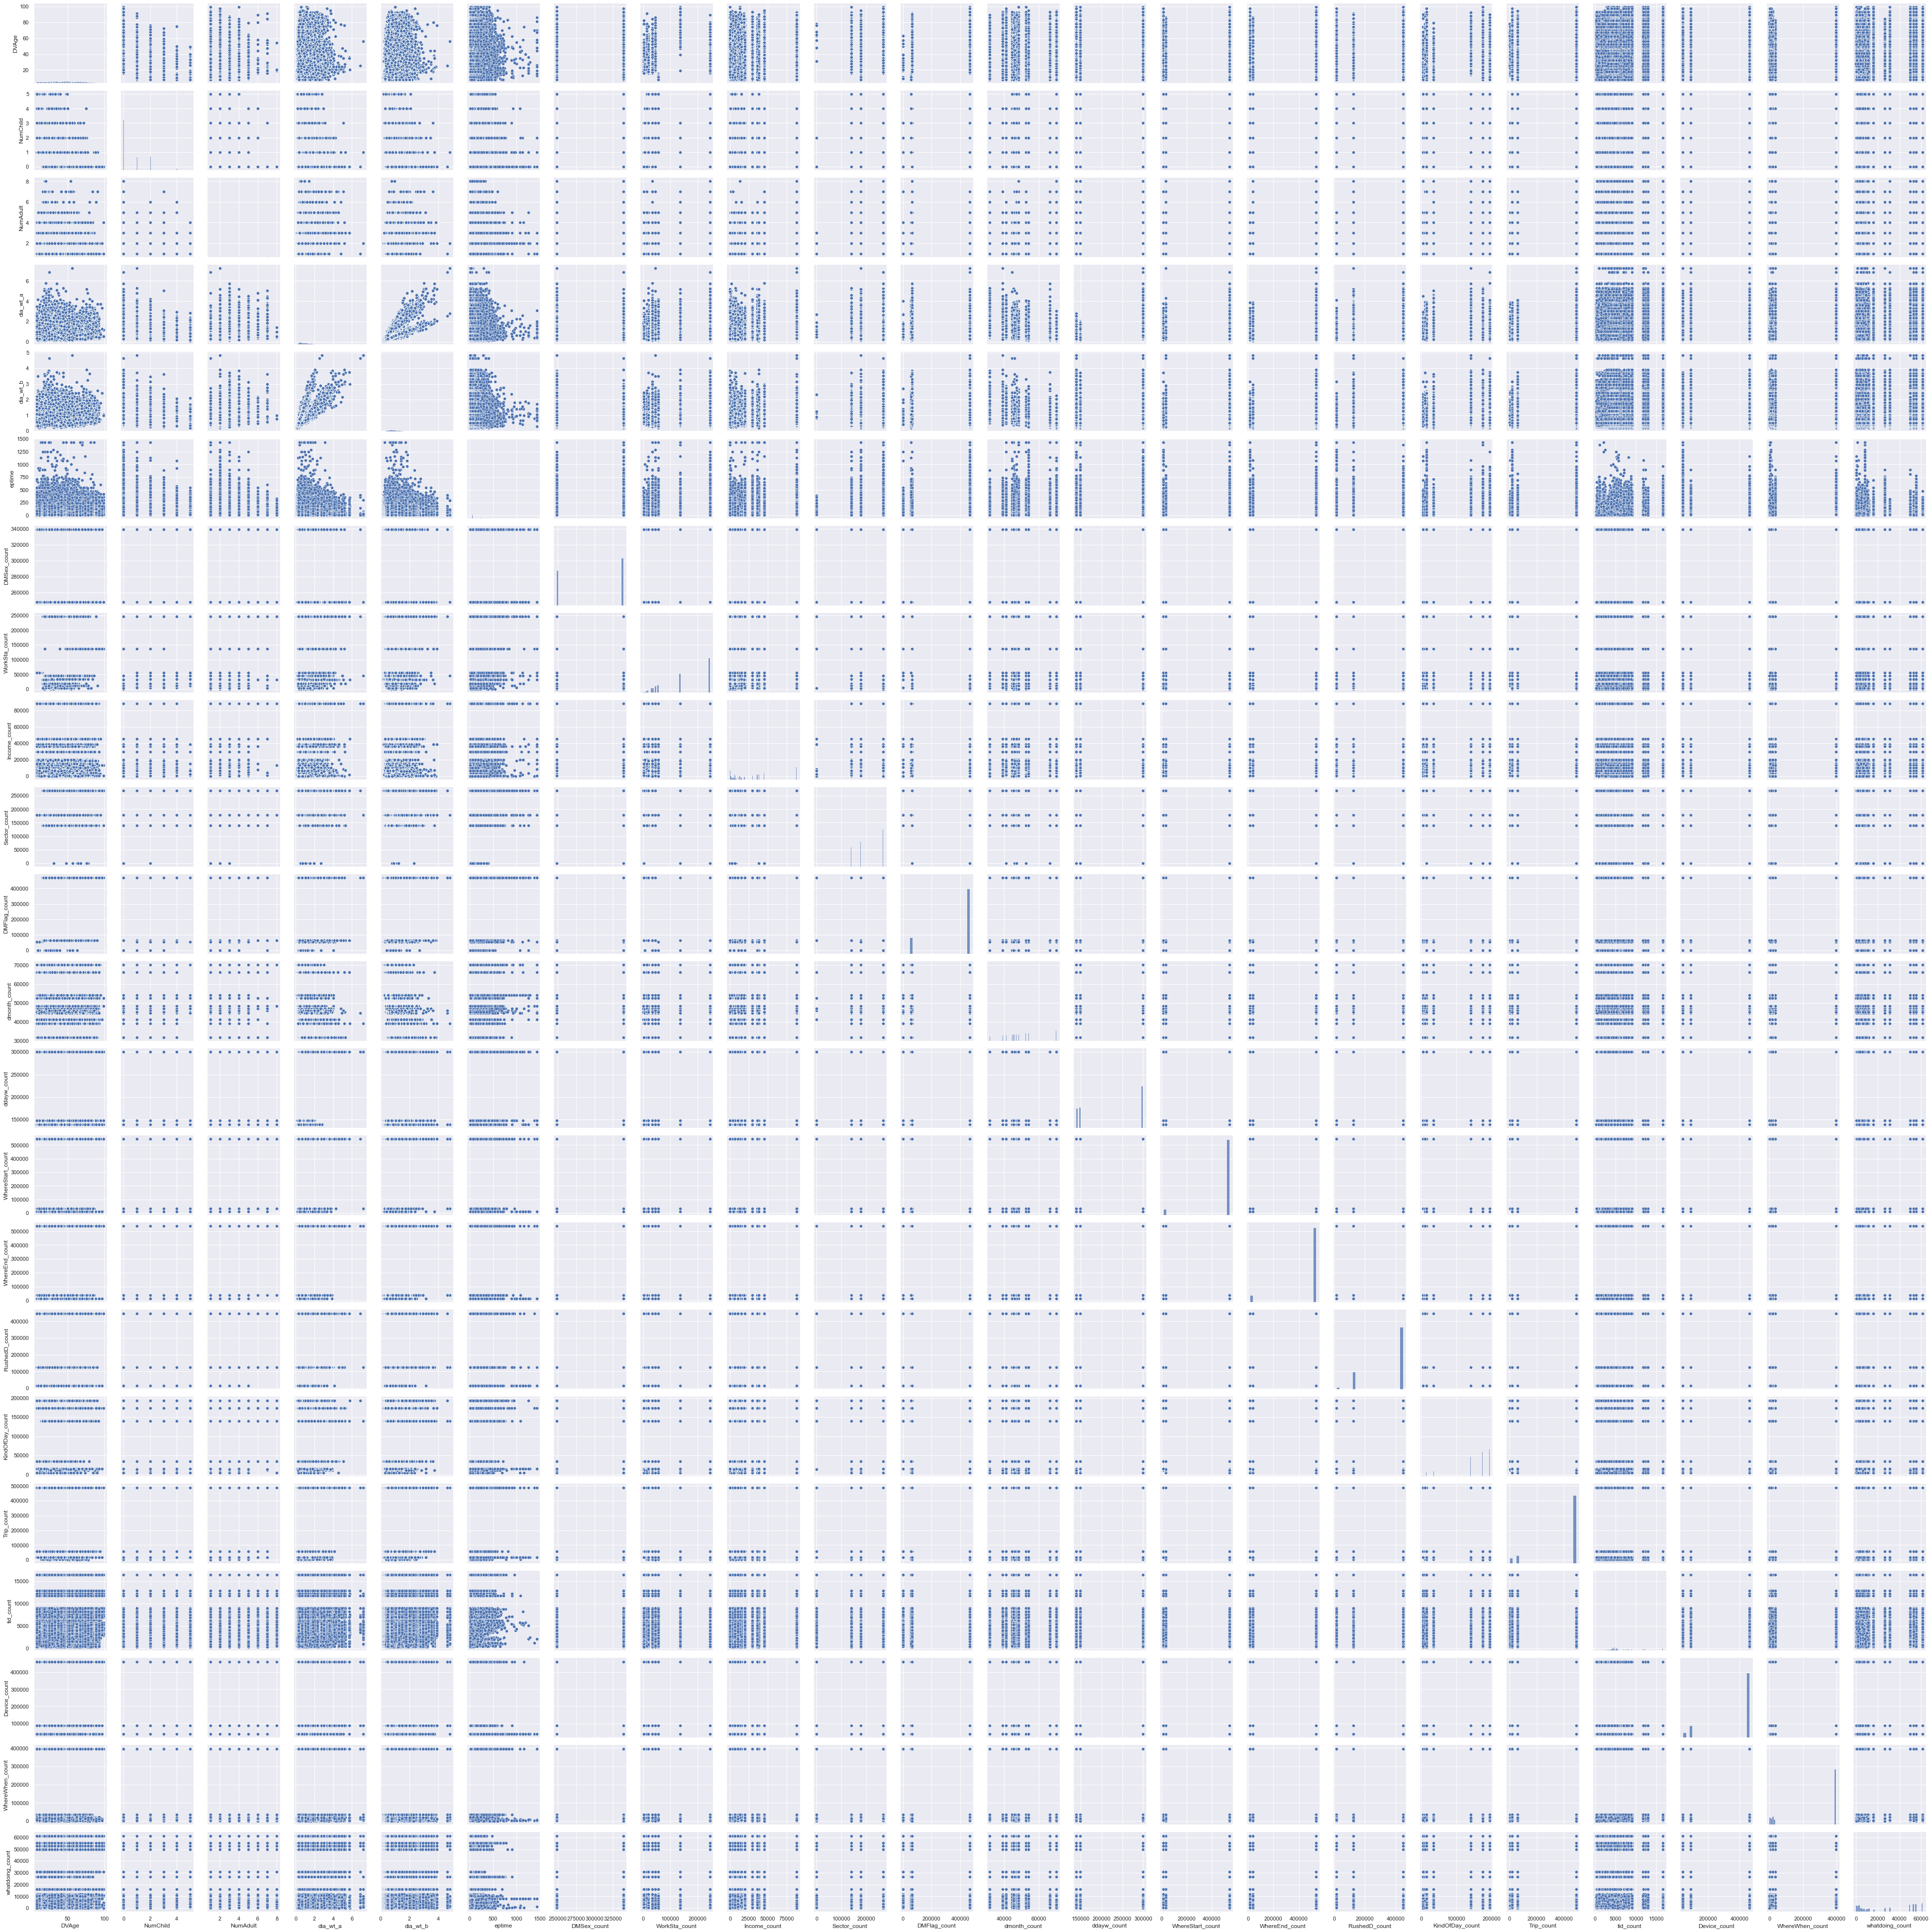

In [ ]:
sns.pairplot(data)

In [ ]:
data.columns

Index(['DVAge', 'NumChild', 'NumAdult', 'dia_wt_a', 'eptime', 'DMSex_count',
       'WorkSta_count', 'Income_count', 'Sector_count', 'DMFlag_count',
       'dmonth_count', 'ddayw_count', 'WhereStart_count', 'WhereEnd_count',
       'RushedD_count', 'KindOfDay_count', 'Trip_count', 'tid_count',
       'Device_count', 'WhereWhen_count', 'whatdoing_count'],
      dtype='object')

In [47]:
X = data.drop('eptime', axis=1)
y = data.iloc[:,4].values

In [49]:
np.median(y)

20.0

In [ ]:
y[:10]

array([110.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  30.,  10.])

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
from sklearn.preprocessing import normalize
X_train = normalize(X_train,norm='l2')
X_test = normalize(X_test,norm='l2')
# y_train = normalize(y_train,norm='l2')
# y_test = normalize(y_test,norm='l2')

In [52]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 42)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [4]:
X_test.head()

NameError: name 'X_test' is not defined

In [54]:
prediction = regressor.predict(X_test)
mse = mean_squared_error(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)
r2 = r2_score(y_test, prediction)
rmse = mse**.5

print(f'Mean Sq Error: {mse}')
print(f'Root Mean Sq Error: {rmse}')
print(f'Mean Abs Error: {mae}')
print(f'R-square: {r2}')

Mean Sq Error: 2493.599332092302
Root Mean Sq Error: 49.93595229984407
Mean Abs Error: 27.455288614801233
R-square: 0.3727213039897116


40.418020527102996

In [ ]:
## Define Grid 
from sklearn.model_selection import GridSearchCV
grid = { 
    'n_estimators': [10,100,200],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [42]
}
## Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
CV_rfr.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [300, 400, 500],
                         'random_state': [18]})

In [ ]:
CV_rfr.best_params_

{'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 300,
 'random_state': 18}

In [ ]:
# Create and train model
rf = RandomForestRegressor(n_estimators = 100, max_features = 'sqrt', max_depth = 6, random_state = 42)
rf.fit(X_train, y_train)
# Predict on test data
prediction = rf.predict(X_test)
# Compute mean squared error
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5

In [ ]:
print(mse)
print(rmse)

2827.9226321801
53.178215767173874


In [ ]:
d = [y_test, prediction]
result_df = pd.DataFrame(data=d)

In [ ]:
result_df = result_df.T
result_df.columns = ['y_test', 'prediction']

In [ ]:
result_df = result_df.sort_values(by='prediction')

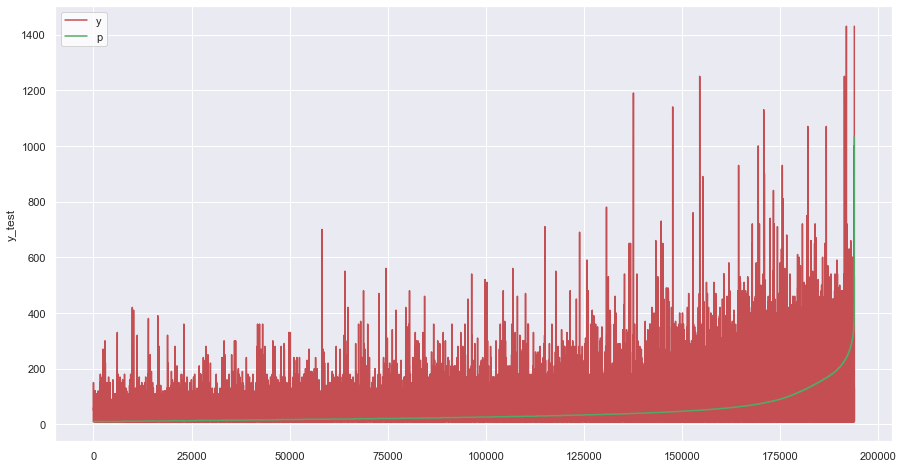

In [ ]:
sns.set(rc={"figure.figsize":(15, 8)}) #width=3, #height=4
sns.lineplot(x = range(result_df.shape[0]), y = 'y_test', data = result_df, color='r')
sns.lineplot(x = range(result_df.shape[0]), y = 'prediction', data = result_df, color='g')
plt.legend(labels=['y','p'], facecolor='white')

In [ ]:
max(y_test)

1430.0

In [ ]:
mpe = np.sum(np.abs(y_test - prediction)*100/y_test)/len(y_test)

In [ ]:
mpe

147.84616570909083

In [ ]:
y1000_idx = np.random.choice(range(X_test.shape[0]), size = 50)
y1000 = y_test[y1000_idx]
p1000 = prediction[y1000_idx]

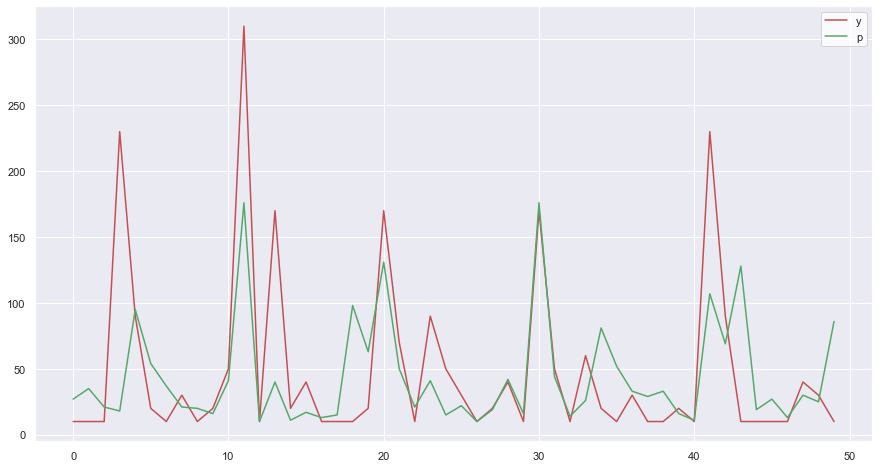

In [ ]:
sns.set(rc={"figure.figsize":(15, 8)}) #width=3, #height=4
sns.lineplot(x = range(50), y = y1000, color='r')
sns.lineplot(x = range(50), y = p1000, color='g')
plt.legend(labels=['y','p'], facecolor='white')

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(result_df['y_test'], result_df['prediction'])


0.3727213039897116

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1920      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 166,785
Trainable params: 166,785
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(filepath = "../models/" + checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/500
9838/9842 [============================>.] - ETA: 0s - loss: 26.8992 - mean_absolute_error: 26.8992
Epoch 00001: val_loss improved from inf to 26.43560, saving model to ../models\Weights-001--26.43560.hdf5
9842/9842 [==============================] - 112s 11ms/step - loss: 26.8976 - mean_absolute_error: 26.8976 - val_loss: 26.4356 - val_mean_absolute_error: 26.4356
Epoch 2/500
9841/9842 [============================>.] - ETA: 0s - loss: 26.1262 - mean_absolute_error: 26.1262
Epoch 00002: val_loss improved from 26.43560 to 26.07349, saving model to ../models\Weights-002--26.07349.hdf5
9842/9842 [==============================] - 104s 11ms/step - loss: 26.1263 - mean_absolute_error: 26.1263 - val_loss: 26.0735 - val_mean_absolute_error: 26.0735
Epoch 3/500
9840/9842 [============================>.] - ETA: 0s - loss: 25.8503 - mean_absolute_error: 25.8503
Epoch 00003: val_loss improved from 26.07349 to 25.99549, saving model to ../models\Weights-003--25.99549.hdf5
9842/9842 [=

In [ ]:
from tensorflow.keras.models import load_model
NN_model = load_model('..\models\Weights-031--24.95670.hdf5') # loding model...
predictions = NN_model.predict(X_test)

In [ ]:
# diff = (np.abs(y_test - predictions)*100/y_test)
mse = mean_squared_error(y_test, predictions)
rmse = mse**.5

print(mse)
print(rmse)

2890.101852913085
53.75966752978561


In [ ]:
r2_score(y_test, predictions)


0.2729789031058607